# Sinc DVR to check 3D teweezer potential

In [18]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**$\Delta x$ matching the length scale is important in the calculation!**

* If $\Delta x$ is too large, the energy might converge to inaccurate values.
* If $\Delta x$ is too small, the kinetic energy will be falsely too large.
<!-- 
## Full diagonalization -->
## Sparse diagonalization

* $x, y$: $L_H=0.25w$, $R=3w$, $dx=0.15w$, $N=20$
* $z$:  $L_H=0.6w$, $R=12w$, by the same proportion $dx=0.36w$, so $N=33$
* What if we set $R=7.2w$? In this case $N=20$, too

In [66]:
for i in range(16, 21):
    mem_est([i for j in range(3)])

mem_set: Matrix size= 35937
mem_set: Estimated full matrix memory usage: 9.62 GiB
mem_set: Matrix size= 42875
mem_set: Estimated full matrix memory usage: 13.70 GiB
mem_set: Matrix size= 50653
mem_set: Estimated full matrix memory usage: 19.12 GiB
mem_set: Matrix size= 59319
mem_set: Estimated full matrix memory usage: 26.22 GiB
mem_set: Matrix size= 68921
mem_set: Estimated full matrix memory usage: 35.39 GiB


H_mat: n=[6 6 6] dx=[0.5 0.5 1.2]w Gaussian starts.
mem_set: Matrix size= 2197
mem_set: Estimated full matrix memory usage: 0.04 GiB
H_solver: Gaussian Hamiltonian solved. Time spent: 0.07s.
H_mat: n=[7 7 7] dx=[0.43 0.43 1.03]w Gaussian starts.
mem_set: Matrix size= 3375
mem_set: Estimated full matrix memory usage: 0.08 GiB
H_solver: Gaussian Hamiltonian solved. Time spent: 0.10s.
H_mat: n=[8 8 8] dx=[0.38 0.38 0.9 ]w Gaussian starts.
mem_set: Matrix size= 4913
mem_set: Estimated full matrix memory usage: 0.18 GiB
H_solver: Gaussian Hamiltonian solved. Time spent: 0.18s.
H_mat: n=[9 9 9] dx=[0.33 0.33 0.8 ]w Gaussian starts.
mem_set: Matrix size= 6859
mem_set: Estimated full matrix memory usage: 0.35 GiB
H_solver: Gaussian Hamiltonian solved. Time spent: 0.23s.
H_mat: n=[10 10 10] dx=[0.3  0.3  0.72]w Gaussian starts.
mem_set: Matrix size= 9261
mem_set: Estimated full matrix memory usage: 0.64 GiB
H_solver: Gaussian Hamiltonian solved. Time spent: 0.39s.
H_mat: n=[11 11 11] dx=[0.27 0

Text(0.5, 1.0, 'Energy levels vs N for 3D Gaussian potential, fixing R = [3.  3.  7.2]w')

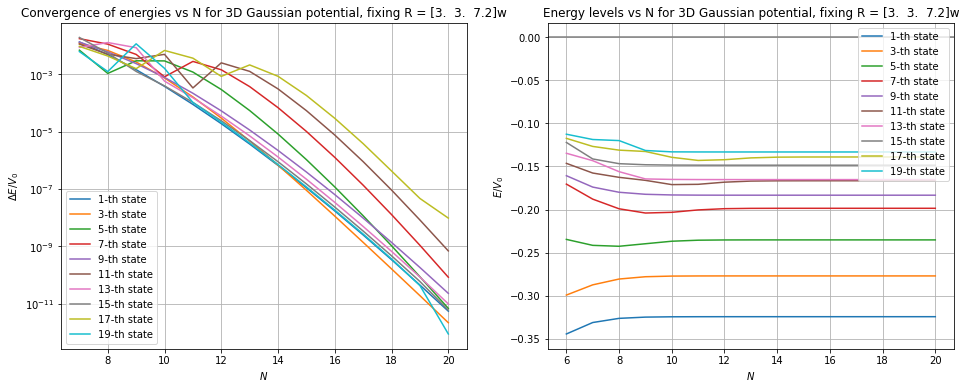

In [83]:
from DVR3d import *
import matplotlib.pyplot as plt

R = 3 * np.array([w, w, 2.4 * w])
dim = 3
Nmax = 20
N_iter = range(6, Nmax + 1, 1)
k = 10
l = 4
# N_arr, dE, E1, x, psi = N_convergence(N_iter,
N_arr, dE, E1 = N_convergence(N_iter,
                              R,
                              k=k,
                              avg=1 / 2,
                              dim=dim,
                              wavefunc=False,
                              level=l)

plot_list = range(0, k, 2)
plot_no = 2
f = plt.figure(figsize=(8 * plot_no, 6))
ax1 = f.add_subplot(1, plot_no, 1)
for i in plot_list:
    ax1.semilogy(N_arr[1:], abs(dE[:, i]), label='{}-th state'.format(i + 1))
ax1.set_xlabel('$N$')
ax1.set_ylabel('$\Delta E/V_0$')
ax1.grid()
ax1.legend(loc='lower left')
ax1.axhline(y=0, color='gray')
ax1.set_title(
    'Convergence of energies vs N for {}D Gaussian potential, fixing R = {}w'.
    format(dim, R[:dim] / w))

# ax2 = f.add_subplot(1, plot_no, 2)
# # for i in range(0, k, 2):
# #     ax2.plot(x, psi[:, i], label='{}-th state'.format(i + 1))
# for i in range(10, len(N_iter), 1):
#     N = list(N_iter)[i]
#     ax2.plot(x, abs(psi[i][:, l - 1])**2, label='N={}'.format(N))
# # ax2.set_xlabel('x/R')
# ax2.set_ylabel('$\\rho$')
# ax2.legend()
# ax2.set_title(
#     '{}-th wavefunc of {}D Gaussian potential @ y=z=0 cross section, R = {}w n={}'
#     .format(l, dim, R[:dim] / w, Nmax))

ax3 = f.add_subplot(1, plot_no, 2)
for i in plot_list:
    ax3.plot(N_arr, E1[:, i], label='{}-th state'.format(i + 1))
ax3.set_xlabel('$N$')
ax3.set_ylabel('$E/V_0$')
ax3.grid()
ax3.legend()
ax3.axhline(y=0, color='gray')
ax3.set_title(
    'Energy levels vs N for {}D Gaussian potential, fixing R = {}w'.format(
        dim, R[:dim] / w))


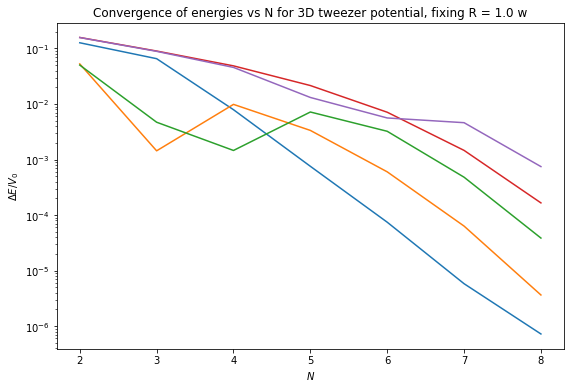

In [41]:
from DVR3d import *
import matplotlib.pyplot as plt

Nmax = 8
# WARNING: do not run N >40 on PC
N, dE, E1 = N_convergence(range(1, Nmax+1), R0)

f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(1, 2, 1)
for i in range(k):
    ax1.semilogy(N[1:], abs(dE[:, i]))
ax1.set_xlabel('$N$')
ax1.grid()
ax1.set_ylabel('$\Delta E/V_0$')
ax1.set_title(
    'Convergence of energies vs N for 3D tweezer potential, fixing R = {} w'.format(R0[0]/w));


# R, dE, E2 = R_convergence(range(5, Nmax, 5), dx0)

# ax2 = f.add_subplot(1, 2, 2)
# for i in range(k):
#     plt.semilogy(R[1:], abs(dE[:, i]))
# ax2.set_xlabel('$R/w$')
# ax2.set_ylabel('$\Delta E/V_0$')
# ax2.set_title(
#     'Convergence of energies vs R for 3D tweezer potential, fixing dx = {:.2f} w'.format(dx0[0]/w));


In [42]:
print(E1)

[[-0.94470067 -0.63832873 -0.63718975 -0.30905274 -0.30877193]
 [-0.81798804 -0.69101722 -0.68743009 -0.46692336 -0.46611331]
 [-0.75247852 -0.69245316 -0.68272998 -0.5568717  -0.55490277]
 [-0.7445818  -0.70230598 -0.68127273 -0.60551692 -0.60051071]
 [-0.74382592 -0.70565372 -0.67409312 -0.62702835 -0.61363043]
 [-0.74375145 -0.70625454 -0.67086558 -0.63414305 -0.60802069]
 [-0.74374564 -0.70631792 -0.67038461 -0.63560473 -0.6034103 ]
 [-0.74374492 -0.70632156 -0.67034603 -0.63577046 -0.60266331]]


The above result agrees with the energy levels given by script from exp group.

## Benchmark by 3D harmonic trap using the sparse diagonalization

In [2]:
from DVR3d_sho import *

n = np.array([20, 20, 20])
dx = 1 / 3
k0 = 10
E, W = H_solver(n, dx)
print(E[:k0])

[1.5 2.5 2.5 2.5 3.5 3.5 3.5 3.5 3.5 3.5]


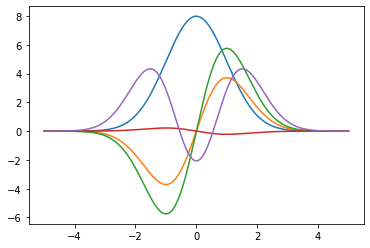

In [13]:
import matplotlib.pyplot as plt

V = np.sum(
    W.reshape(*(np.append(2 * n + 1, k))),
    axis=(1, 2))  # Sum over y, z index to get y=z=0 cross section of the wavefunction
x = np.linspace(-5, 5, int(1000 / dx))[None]
xn = np.arange(-n[0], n[0] + 1)[:, None] * dx
psi = 1 / np.sqrt(dx) * np.sinc((x - xn) / dx).T @ V
for i in range(5):
    plt.plot(x.transpose(), psi[:, i])

Another simple test: set only one direction to have multiple grid points, and let the other two to have only one - this gives the effective 1D system:

[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


Text(0.5, 1.0, 'DVR solution vs exact solution for 1D harmonic w/ dx = 0.33')

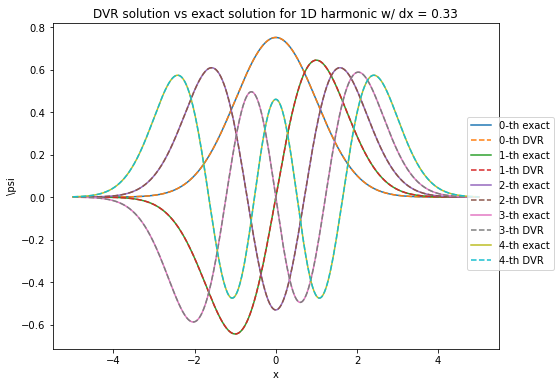

In [16]:
from DVR3d_sho import *
import matplotlib.pyplot as plt
from scipy.special import *

n = np.array([30, 0, 0])
dx = 1 / 3
k0 = 10
E, W = H_solver(n, dx)
print(E[:k0])
V = np.sum(W.reshape(*(np.append(2 * n + 1, k))), axis=(1, 2))
x = np.linspace(-5, 5, int(1000 / dx))[None]
xn = np.arange(-n[0], n[0] + 1)[:, None] * dx
psi = 1 / np.sqrt(dx) * np.sinc((x - xn) / dx).T @ V


def psi0(n, x):
    p = np.exp(-x**2 / 2) * eval_hermite(n, x)
    p *= 1 / np.sqrt(2.**n * np.math.factorial(n))
    p *= 1 / np.pi**(1 / 4)
    return p


k = 5
f = plt.figure(figsize=(8, 6))
for i in range(0, k):
    plt.plot(x.T, psi0(i, x.T), label='{}-th exact'.format(i))
    plt.plot(x.T,
             np.sign(psi0(i, x[..., 0]) / psi[0, i]) * psi[:, i],
             '--',
             label='{}-th DVR'.format(i))

plt.figlegend(loc='center right')
plt.xlabel('x')
plt.ylabel('\psi')
plt.title(
    'DVR solution vs exact solution for 1D harmonic w/ dx = {:.2f}'.format(dx))


### Miscellaneous

In [50]:
n = 1
x = np.arange(-n, n+1)
X = np.meshgrid(x, x, x)
print(X[0][:,:,0])
print(X[1][:,:,0])
print(X[2][:,:,0])

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]


$x$ coordinate `X[0]` values change only when varying along $x$ direction, and so on for `X[1]`, `X[2]`

In [59]:
n = 1
x = np.arange(-n, n+1)
# X = np.mgrid[-n:n+1, -n:n+1, -n:n+1]
X = np.meshgrid(x, x, x, indexing='ij')
print(X[0][:,:,0])
print(X[1][:,:,0])
print(X[2][:,:,0])

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]


Note the difference b/t `eye` and `zeros` (`ones`)

In [11]:
print(np.eye(1))
print(np.zeros(1))

[[1.]]
[0.]
